In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 

In [2]:
# loading the dataset
df = pd.read_excel('energy.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [11]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [12]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [13]:
df.shape

(9568, 5)

<Axes: >

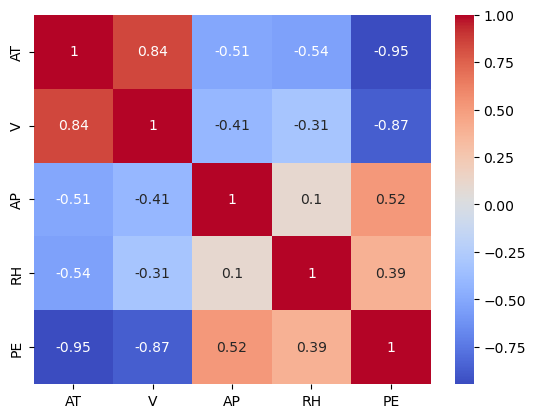

In [4]:
# visualize the dataset 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

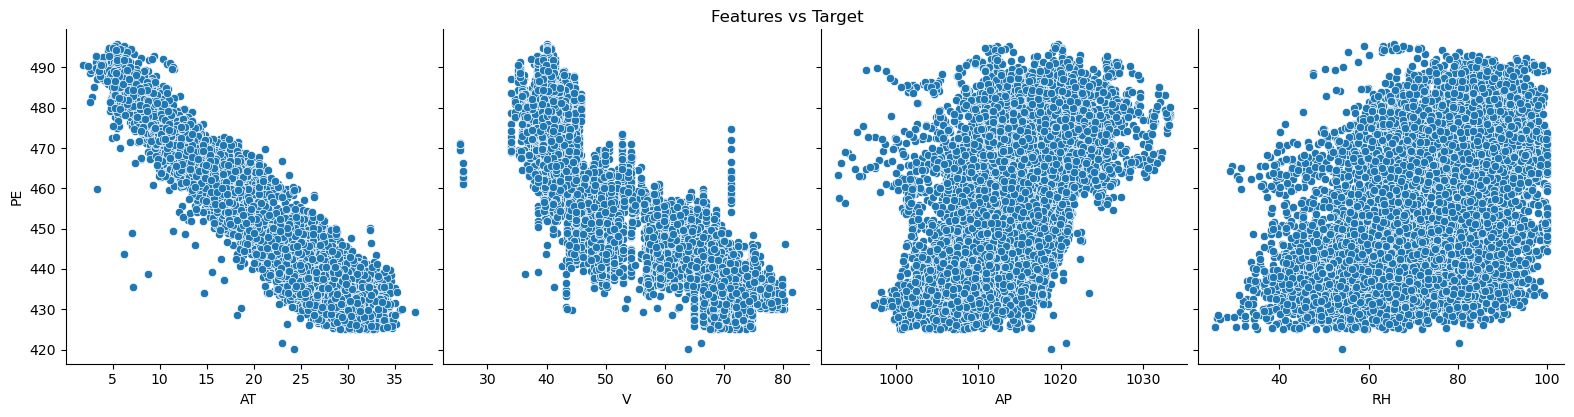

In [22]:
sns.pairplot(df,x_vars=['AT','V','AP','RH'],y_vars='PE',height=4,aspect=1,kind='scatter')
plt.suptitle('Features vs Target',y=1.02)
plt.show()

In [9]:
# scale the dataset using MinMaxScaler() - it scales data into fixed range. 0,1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['AT','V','AP','RH']])

In [10]:
y = df['PE']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
X_train.shape

(7176, 4)

In [25]:
X_test.shape

(2392, 4)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, input_shape=(4,),activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics=['mae']
)

model.fit(X_train,y_train,epochs=15)

Epoch 1/15
225/225 [==============================] - 2s 5ms/step - loss: 60657.8594 - mae: 177.1911
Epoch 2/15
225/225 [==============================] - 1s 5ms/step - loss: 1817.9677 - mae: 34.2612
Epoch 3/15
225/225 [==============================] - 1s 5ms/step - loss: 1125.1178 - mae: 26.7700
Epoch 4/15
225/225 [==============================] - 1s 5ms/step - loss: 730.1879 - mae: 21.3967
Epoch 5/15
225/225 [==============================] - 1s 5ms/step - loss: 442.1494 - mae: 16.3914
Epoch 6/15
225/225 [==============================] - 1s 5ms/step - loss: 259.5709 - mae: 12.4406
Epoch 7/15
225/225 [==============================] - 1s 5ms/step - loss: 151.6087 - mae: 9.5069
Epoch 8/15
225/225 [==============================] - 1s 5ms/step - loss: 87.8079 - mae: 7.2902
Epoch 9/15
225/225 [==============================] - 1s 5ms/step - loss: 51.1142 - mae: 5.6325
Epoch 10/15
225/225 [==============================] - 1s 5ms/step - loss: 33.8138 - mae: 4.6038
Epoch 11/15
225/225 [

In [32]:
model.evaluate(X_test,y_test)

75/75 [==============================] - 1s 4ms/step - loss: 21.5802 - mae: 3.6207


[21.58015251159668, 3.620666265487671]

In [35]:
# using early stopping method
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor = 'mae',
    patience = 5,
    restore_best_weights = True,
    verbose = 1
)

In [36]:
model.fit(X_train,y_train,epochs=15,callbacks=[early_stop])

Epoch 1/15
225/225 [==============================] - 1s 3ms/step - loss: 20.4474 - mae: 3.5418
Epoch 2/15
225/225 [==============================] - 1s 3ms/step - loss: 20.7656 - mae: 3.5622
Epoch 3/15
225/225 [==============================] - 1s 3ms/step - loss: 21.4365 - mae: 3.6170
Epoch 4/15
225/225 [==============================] - 1s 3ms/step - loss: 19.9543 - mae: 3.5045
Epoch 5/15
225/225 [==============================] - 1s 3ms/step - loss: 19.3369 - mae: 3.4422
Epoch 6/15
225/225 [==============================] - 1s 3ms/step - loss: 19.8574 - mae: 3.4910
Epoch 7/15
225/225 [==============================] - 1s 3ms/step - loss: 20.1831 - mae: 3.5162
Epoch 8/15
225/225 [==============================] - 1s 3ms/step - loss: 19.8903 - mae: 3.4843
Epoch 9/15
225/225 [==============================] - 1s 3ms/step - loss: 20.0857 - mae: 3.4995
Epoch 10/15
225/225 [==============================] - 1s 3ms/step - loss: 20.3515 - mae: 3.5342
Epoch 10: early stopping


In [38]:
y_pred = model.predict(X_test).flatten()

75/75 [==============================] - 0s 2ms/step


In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error : {mse:.2f}')
print(f'Mean absolute error : {mae:.2f}')
print(f'R2 score : {r2:.2f}')

Mean squared error : 19.86
Mean absolute error : 3.48
R2 score : 0.93


In [46]:
# making prediction by passing data to check models predictions
new_data = np.array([[8.34,40.77,1010.84,90.01]])
new_data_scaled = scaler.transform(new_data)
model.predict(new_data_scaled)

C:\Users\Dell\anaconda3\envs\tfkernel\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 307ms/step


array([[480.23346]], dtype=float32)